# 개요

* 아래의 목적/이유로 참가한 스터디에 대한 기록
  * SQLD취득 후 장기 미사용 & GPT를 통한 SQL사용 등으로 많이 잊은 SQL을 복기
  * 기존에 사용해 본 Optuna가 아닌 Autogluon이 커리큘럼에 있어 익혀보고자 함
  * 기존에 관심있던 XAI(설명가능한 AI)를 익히고자 함

* 6주차 요약
  * 모델별 주요 하이퍼 파라미터
  * optuna
  * Autogluon

# 5주차 과제 내용정리

* SHAP Force plot 여러개 비교 = Row(표본)별 비교

# (추가)Multi label에 대한 Catboost실습

In [ ]:
# importing Libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

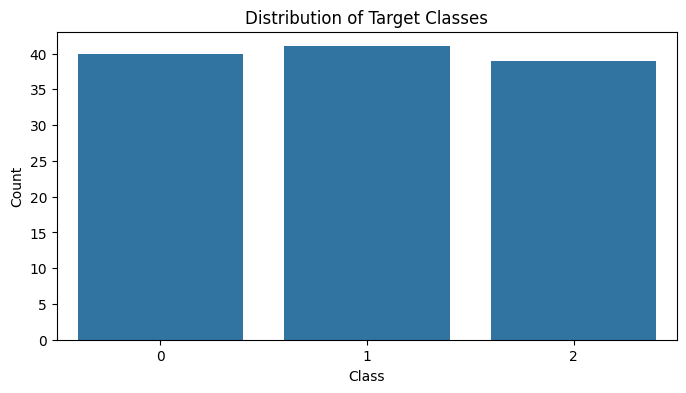

In [ ]:
# Load the Iris dataset
iris_df = load_iris()
X = iris_df.data
y = iris_df.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure with specified dimensions (8x4)
plt.figure(figsize=(8, 4))

# Generate a countplot to display the distribution of target classes (y_train)
sns.countplot(x=y_train)

# Set the title, x-axis label, and y-axis label for the plot
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

In [ ]:
# 모델 설정 및 학습
model = CatBoostClassifier(
    iterations=100, depth=6, learning_rate=0.1,
   loss_function='MultiClass', verbose=False)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# (추가)VS CODE 팝업이 떠서 찾아보는 Tensorboard

* Catboost는 지원하지 않아 타 모델로 향후 실험

In [ ]:
import tensorflow as tf

# TensorBoard 로그를 저장할 디렉토리 설정
log_dir = "logs/fit"

# SummaryWriter 설정
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# 모델 학습 시 callback 추가
model.fit(X_train, y_train, callbacks=[tensorboard_callback])

In [ ]:
!tensorboard --logdir=logs/fit

# 6주차 수업정리

## 하이퍼 파라미터

* 하이퍼 파라미터 튜닝 : 모델의 초기 설정값을 최적의 값으로 구하는 것

### 하이퍼 파라미터 - RF(Random Forest, Bagging)

* 주요 설정값
  * `n_estimators` : 트리의 수 (Default=100)
    * 증가할수록 계산비용 & 성능 증가 (일정수준부터는 크게 상승하지 않음)
      * ↔ 감소할수록 계산비용 감소. 그러나 과소적합 발생할 가능성
    * (경험적으로)천 단위에서 마감하는 것이 좋음(만 단위에서 유의미한 성능향상 X)
  * `max_depth` : 트리의 최대 깊이 (Default=None)
    * 증가할수록 모델의 복잡도 & 과적합가능성 증대(복잡한 패턴을 익힐 수 있음)
      * ↔ 감소할수록 과소적합 발생할 수 있음
  * `min_samples_split` : 노드를 분할하기 위한 최소 샘플 수 (Default=2)
    * 증가할수록 과적합 방지 & 성능 감소
      * ↔ 감소할수록 과적합 위험이 커짐(트리가 얕아짐짐)
  * `min_samples_leaf` : 분할이 모두 끝난 노드(리프노드)의 최소 샘플 크기 (Default=1)
    * 증가할수록 과적합 방지 & 성능 감소
      * ↔ 감소할수록 과적합 위험이 커짐
  * `max_features` : 각 트리를 학습할 때 사용할 feature의 비율 (Default=1.0)
    * 증가할수록 성능/계산비용용 향상 & 과적합 확률 증가

### 하이퍼 파라미터 - XGB(XGBoost, Boosting)

* 주요 설정값
  * `n_estimators` : 부스팅 단계의 수 (Default=100)
    * RF와 뜻은 다르지만 양상은 비슷함
      * 클수록 계산비용/성능 향상(↔과소적합). 천단위 마감
  * `max_depth` : 트리의 최대 깊이 (Default=6)
    * 증가할수록 과적합 위험 증대
  * `Learning_rate(eta)` : 부스팅 단계에서 학습률을 조절 (Default=0.3)
    * 배깅이 아닌 부스팅이므로, 학습률 개념이 있음
    * 증가할수록 학습속도가 빨라지고, 초반 데이터에 가중치(+최적해를 놓칠 위험 있음)
      * ↔ 낮을수록 느리지만 최적해에 안정적으로 수렴
  * `subsample` : 각 단계에서 사용할 데이터 샘플[row]의 비율 (Default=1.0)
    * 증가할수록 과적합방지 & 성능적 단점
  * `colsample_bytree` : 각 트리를 학습할 때 사용할 feature[column]의 비율 (Default=1.0)
    * 증가할수록 성능/비용 증가 & 과적합 위험
  * gamma : 노드 분할시 필요한 최소 손실 감소량 (Default=0)
    * 0인 경우, Loss감소가 없더라도 성능에 부정적이지 않는다면 분할
    * 증가할수록 노드 분할을 엄격히 수행(과적합 방지, 성능 하향)

### 하이퍼 파라미터 - LGBM(Light GBM)

* 주요 설정값
  * 타 모델과 유사
    * `n_estimators`[Default=100], `learning_rate`[Default=0.1], `subsample`(bagging_fraction, bagging) [Default=1.0], 
    * Feature_fraction(`colsample_bytree`)[Default=1.0], `max_depth`[Default=-1]
  * Num_leaves : 하나의 트리가 가질 수 있는 최대의 (분할이 끝난)리프 노드 수(Default=31)
    * 값이 증가할수록 트리가 복잡 & 과적합 & 메모리 사용 증가
  * Min_data_in_leaf(min_child_samples) : 리프 노드의 최소 샘플 수 (Default=20)

### 하이퍼 파라미터 - Catboost

* 주요 설정값
  * 타 모델과 유사
    * n_estimators[Default=100], learning_rate[Default=0.03], subsample[Default=None], Feature_fraction[Default=None]
  * `Depth` : 트리의 최대 깂이 (Default=-1)
  * `Bagging_temperature` : 샘플링의 무작위성을 제어 (Default=1.0)
    * 높을수록 샘플링이 다양해지며 일반화 성능 향상 (속도 느려짐)
  * `L2_leaf_reg` : 리프 노드의 가중치에 부여하는 패널티의 정도 (Default=3)
    * 클수록 과적합 방지
  

## optuna

### optuna란

* 기존의 Tuning Tools
  * Grid Search : 오래걸리지만 Grid에 적절한 값이 없으면 최적값을 찾지 못함
  * Random Search : 위의 Grid Search 문제를 해결해도 최적값을 꼭 찾지 못함
* optuna vs hyperopt
  * 25년 1월 기준, github star 기준으로 optuna 11.3k > hyperopt 7.3k
* optuna
  * 정의한 목적함수를 기반으로 최적화를 쉽게 진행
    * 베이지안 최적화와 유사한 TPE알고리즘을 사용한 탐색을 지행(그 외의 다양한 전략도 커스터마이징 가능)

### optuna 구성요소와 작동방식

* 구성요소
  * Study : 최적화 과정 전체를 관리. 각 하이퍼 파라미터 탐색(Trial)의 결과를 저장
  * Search Space : 하이퍼 파라미터의 범위 지정
  * Objective function : 목적함수. 모델을 학습시키고 평가지표를 반환
  * Trial : 하이퍼파라미터의 조합을 나타내는 단위 (1번의 Trial로 목적함수를 실행)
* 작동방식
  * Search Space(탐색공간)에서 int/float/categorical 등을 정의
  * Objective function(목적함수)를 실행해 모델학습하고 성능지표 반환
  * 정의된 조합을 효율적으로 선택해, 반복적으로(Trial) 성능 개선
  * 최적의 하이퍼파라미터와 정보를 Study객체에 저장
* 참고
  * Search Space에서 정의한 범위에서 조합하므로, 그 밖의 범위에서 최적해가 있으면 찾을 수 없음

## optuna 실습

### 데이터 로딩

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, log_loss
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

data = pd.read_csv("data_preprocessed.csv")

### LGBM Vanila모델

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

X = data.drop(columns=["TARGET"])
y = data["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Full Model
full_model = LGBMClassifier(class_weight="balanced", random_state=42)
full_model.fit(X_train, y_train)

# Full Pred
y_pred_full = full_model.predict(X_test)
y_proba_full = full_model.predict_proba(X_test)

# Full Results
accuracy_full = accuracy_score(y_test, y_pred_full)
auc_full = roc_auc_score(y_test, y_proba_full[:, 1])
cf_full = confusion_matrix(y_test, y_pred_full)

print(f'정확도 : {round(accuracy_full,4)}')
print(f'AUC : {round(auc_full,4)}')
print(f'''Vanilla LGBM의 CF :
{cf_full}''')

정확도 : 0.703
AUC : 0.7578
Vanilla LGBM의 CF :
[[39914 16640]
 [ 1629  3320]]


### LGBM with optuna

* 최적의 하이퍼파라미터 조합 찾기

In [ ]:
import optuna
from lightgbm import LGBMClassifier, early_stopping

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# 목적 함수 정의
def objective(trial):
    # LGBMClassifier 하이퍼파라미터 설정
    param = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log = True), # default = 0.1
        'num_leaves': trial.suggest_int('num_leaves', 20, 100), # default = 31
        # 'max_depth': trial.suggest_int('max_depth', -1, 50), # default = -1
        'n_estimators' : trial.suggest_int('n_estimators', 100, 2000), # default = 100
        'subsample': trial.suggest_float('subsample', 0.8, 1.0), # default = 1.0
        'min_child_samples' : trial.suggest_int('min_data_in_leaf', 1, 100), # default = 20
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0), # default = 1.0
    }

    # LGBMClassifier 모델 생성 및 학습
    model = LGBMClassifier(**param, n_jobs=-1,
                           class_weight='balanced',
                           random_state=42,
                          #  device_type='gpu', colab환경에서 정상적으로 gpu가 활용이 안되네요...이거 해결만 온종일 할 거 같아서 일단 cpu기준으로 학습합니다.
                          #  https://stackoverflow.com/questions/75981883/can-not-use-lightgbm-gpu-in-colab-lightgbmerror-no-opencl-device-found
                           )
    model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              eval_metric='auc',
              callbacks=[early_stopping(stopping_rounds=50, verbose=False)]
    )

    # 검증 데이터에 대한 예측
    proba = model.predict(X_val)

    # 정확도 계산
    roc_auc = roc_auc_score(y_val, proba)

    return roc_auc

# Optuna 튜닝 실행
study = optuna.create_study(direction='maximize') # 높아질수록 좋은 roc_auc_score에 대해 maximize
study.optimize(objective, n_trials=50)

In [ ]:
# 최적 파라미터 출력
best_params = study.best_trial.params
print(best_params)

{'learning_rate': 0.02642230824686883, 'num_leaves': 34, 'n_estimators': 864, 'subsample': 0.8342595493628282, 'min_data_in_leaf': 60, 'colsample_bytree': 0.8360285193709883}


* 찾은 조합을 활용한 final model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = LGBMClassifier(**best_params,
                             n_jobs=-1,
                             class_weight='balanced',
                             random_state=42,)
final_model.fit(X_train, y_train)

# optuna Pred
y_pred_final = final_model.predict(X_test)
y_proba_final = final_model.predict_proba(X_test)

# optuna Results
accuracy_final = accuracy_score(y_test, y_pred_final)
auc_final = roc_auc_score(y_test, y_proba_final[:, 1])
cf_final = confusion_matrix(y_test, y_pred_final)

print(f'정확도 : {round(accuracy_final,4)}')
print(f'AUC : {round(auc_final,4)}')
print(f'''Optuna LGBM의 CF :
{cf_final}''')

[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
정확도 : 0.7229
AUC : 0.7602
Optuna LGBM의 CF :
[[41245 15309]
 [ 1735  3214]]


### LGBM 결과비교 (vanila모델 vs optuna)

* LGBM Vanila모델
  * 정확도 : 0.703
  * AUC : 0.7578
  * Vanilla LGBM의 CF :
[[39914 16640]
 [ 1629  3320]]

* LGBM with optuna
  * 정확도 : 0.7229
  * AUC : 0.7602
  * Optuna LGBM의 CF :
[[41245 15309]
 [ 1735  3214]]

## Autogluon

### Autogluon이란

* Autogluon : optuna와 비슷한 방식으로 최적화하며, 최소한의 코드

### Autogluon구성요소와 설정값

* 구성요소
  * `TablePredictor` : (분류/회귀에 사용) Tabular데이터 처리
  * `TimeSeriesPredictor` : 시계열 데이터 예측
  * `TextPredictor` : (연관성 분석 등) 자연어 처리
  * `ImagePredictor` : 이미지 처리
* 설정값
  * `Time_limit` : 학습 제한시간(Default=None)
  * `Presets` : 사전 설정된 학습 전략 (best/high/good/medium quality. medium이 기본값)
  * `hyperparameters` : (dict) 사용할 모델의 하이퍼파라미터들
  * `Auto_stack` : 배깅 및 스택 앙상블링을 자동으로 활용할지 여부(Default=False)
    * True(더 오래/정확히 학습)인 경우, `num_bag_fold`  & `num_stack_levels` 자동 설정
      * `num_bag_fold` : 배깅에 사용되는 폴드 수. 성능을 높이고 싶다면 5~10 사이를 권장(10이하의 값을 가짐)
      * `num_stack_levels` : 스택에 사용되는 스태킹 레벨 수. 성능을 높이고 싶다면 2~3 사이를 권장(3이하의 값을 가짐)
* Leader board

## Autogluon실습

### 하단 코드의 실행내역 이해하기 

* 실행내역 중 일부만 발췌함
```
# 0,1로 추정되는 값 bool 변환
Stage 1 Generators:
    Fitting AsTypeFeatureGenerator...
        Note: Converting 48 features to boolean dtype as they only contain 2 unique values.

# Null값 처리
Stage 2 Generators:
    Fitting FillNaFeatureGenerator...

# 그대로 사용할 값 처리(변환X)
Stage 3 Generators:
    Fitting IdentityFeatureGenerator...

# Unique값 처리
Stage 4 Generators:
    Fitting DropUniqueFeatureGenerator...

# 중복값 처리
Stage 5 Generators:
    Fitting DropDuplicatesFeatureGenerator...

# Feature 처리(앞서 전처리한 데이터이기는 하나, autogluon이 판단하여 추가 처리)
Unused Original Features (Count: 4): ['FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']
    These features were not used to generate any of the output features. Add a feature generator compatible with these features to utilize them.
    Features can also be unused if they carry very little information, such as being categorical but having almost entirely unique values or being duplicates of other features.
    These features do not need to be present at inference time.
    ('int', []) : 4 | ['FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12']

# 사용할 모델
User-specified model hyperparameters to be fit:
{
	'NN_TORCH': [{}],
	'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, {'learning_rate': 0.03, 'num_leaves': 128, 'feature_fraction': 0.9, 'min_data_in_leaf': 3, 'ag_args': {'name_suffix': 'Large', 'priority': 0, 'hyperparameter_tune_kwargs': None}}],
	'CAT': [{}],
	'XGB': [{}],
	'FASTAI': [{}],
	'RF': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'XT': [{'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}}, {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression', 'quantile']}}],
	'KNN': [{'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}}, {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}}],
}

# sequential하게 trial 진행
Fitting 13 L1 models, fit_strategy="sequential" ...
Fitting model: KNeighborsUnif ... Training model for up to 3595.93s of the 3595.92s of remaining time.
	0.5271	 = Validation score   (roc_auc)
	1.62s	 = Training   runtime
	50.83s	 = Validation runtime
Fitting model: KNeighborsDist ... Training model for up to 3543.23s of the 3543.23s of remaining time.
	0.5298	 = Validation score   (roc_auc)
	0.63s	 = Training   runtime
	49.39s	 = Validation runtime
...

# 실행시간 및 best model
AutoGluon training complete, total runtime = 1561.52s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4907.4 rows/s (24601 batch size)
```

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

path = 'autogluon_results' # 저장할 경로로

# 데이터 분할 (이전 코드에서 X_train, y_train, X_val, y_val, X_test, y_test를 준비했다고 가정)

# 데이터프레임으로 변환
train_data = X_train
train_data['target'] = y_train

val_data = X_val
val_data['target'] = y_val

# AutoGluon 학습
predictor = TabularPredictor(label='target', eval_metric='roc_auc', verbosity=2, path=path)
predictor.fit(train_data, tuning_data=val_data, time_limit=3600)  # 시간 제한 설정 (1시간)

In [ ]:
# 예측 및 평가
test_data = X_test
test_data['target'] = y_test

y_pred_proba_ag = predictor.predict_proba(test_data)
y_pred_ag = predictor.predict(test_data)

# optuna Results
accuracy_ag = accuracy_score(y_test, y_pred_ag)
auc_ag = roc_auc_score(y_test, y_pred_proba_ag.iloc[:, 1])
cf_ag = confusion_matrix(y_test, y_pred_ag)

print(f'정확도 : {round(accuracy_ag,4)}')
print(f'AUC : {round(auc_ag,4)}')
print(f'''autogluon LGBM의 CF :
{cf_ag}''')

정확도 : 0.9199
AUC : 0.761
autogluon LGBM의 CF : 
[[56492    62]
 [ 4864    85]]


### 결과 비교하기 (optuna vs autogluon)

* LGBM with optuna
  * 정확도 : 0.7229
  * AUC : 0.7602
  * Optuna LGBM의 CF :
    [[41245 15309]
    [ 1735  3214]]

* Autogluon
  * 정확도 : 0.9199
  * AUC : 0.761
  * autogluon LGBM의 CF : 
[[56492    62]
 [ 4864    85]]

### Autogluon leaderboard

* Leaderboard : Autogluon이 학습했던 모델들의 Score확인 가능
  * 각 모델의 score나 time 등을 확인 가능

In [ ]:
# 최적 모델 요약 출력
print(predictor.leaderboard())

                  model  score_val eval_metric  pred_time_val    fit_time  \
0   WeightedEnsemble_L2   0.754022     roc_auc       5.013031  663.924621   
1              CatBoost   0.753185     roc_auc       0.050006  108.363011   
2              LightGBM   0.750591     roc_auc       0.188981   20.328846   
3               XGBoost   0.749953     roc_auc       0.238468   74.874593   
4            LightGBMXT   0.749184     roc_auc       0.669894   49.791667   
5         LightGBMLarge   0.748378     roc_auc       0.653803   39.147023   
6        NeuralNetTorch   0.740312     roc_auc       0.203650  140.524567   
7       NeuralNetFastAI   0.737314     roc_auc       0.325043  136.662297   
8      RandomForestEntr   0.731284     roc_auc       1.649255  304.078007   
9        ExtraTreesEntr   0.722843     roc_auc       1.512995  135.927222   
10       ExtraTreesGini   0.722248     roc_auc       1.357874  120.171119   
11     RandomForestGini   0.720812     roc_auc       2.502675  288.912408   

## paramater를 직접 지정하기
- Autogluon은 이렇게 기본으로 사용해도 훌륭한 성능을 보여줍니다. 자동으로 파라미터를 지정하고, 앙상블까지 해주죠.
- 이런 베이스 모델을 생성한 뒤에는, 쓸모 없거나 너무 무거운 모델은 제거하고 다시 학습시킬 수도 있습니다.
- LGBM, XGB, CAT 세 개가 성능도 괜찮고 학습시간도 짧네요. 이거 세 개만 써봅시다.
- 위에서 Optuna에서 찾은 파라미터를 여기서 사용하실 수도 있겠죠?

### Autogluon 하이퍼파라미터 설정

* 베이스 모델을 생성한 뒤, 쓸모 없거나 너무 무거운 모델을 제거하고 학습 가능(Leaderboard로 확인)
* 위의 Leaderboard 결과에서, LGBM/XGB/CAT을 가지고 하이퍼파라미터를 설정

In [ ]:
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import os

from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd

path = 'drive/MyDrive/Metacode/Week6/selected_model'
os.makedirs(path, exist_ok=True)

train_data = X_train
train_data['target'] = y_train

val_data = X_val
val_data['target'] = y_val

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])  # 불균형 데이터 가중치 설정

# 모델별 하이퍼파라미터 지정
custom_hyperparameters = {
    'GBM': {
        'learning_rate': 0.02642230824686883,
        'num_leaves': 34,
        'n_estimators': 864,
        'subsample': 0.8342595493628282,
        'min_data_in_leaf': 60,
        'colsample_bytree': 0.8360285193709883,
        'n_jobs':-1,
        'class_weight':'balanced'
    },
    'CAT': {
        'scale_pos_weight': scale_pos_weight
    },
    'XGB': {
        'scale_pos_weight': scale_pos_weight
    }
}

# AutoGluon 학습
predictor = TabularPredictor(label='target', eval_metric='roc_auc', verbosity=2, path=path)
predictor.fit(
    train_data,
    tuning_data=val_data,
    time_limit=3600,
    hyperparameters=custom_hyperparameters
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.70 GB / 12.67 GB (68.6%)
Disk Space Avail:   0.50 GB / 15.00 GB (3.3%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in compet

In [ ]:
# 예측 및 평가
test_data = X_test
test_data['target'] = y_test

y_pred_proba_ag = predictor.predict_proba(test_data)
y_pred_ag = predictor.predict(test_data)

# optuna Results
accuracy_ag = accuracy_score(y_test, y_pred_ag)
auc_ag = roc_auc_score(y_test, y_pred_proba_ag.iloc[:, 1])
cf_ag = confusion_matrix(y_test, y_pred_ag)

print(f'정확도 : {round(accuracy_ag,4)}')
print(f'AUC : {round(auc_ag,4)}')
print(f'''autogluon CF :
{cf_ag}''')

정확도 : 0.8675
AUC : 0.7107
autogluon CF :
[[51892  4662]
 [ 3486  1463]]


In [ ]:
predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.998176,roc_auc,11.441149,1556.763843,11.441149,1556.763843,1,True,3
1,WeightedEnsemble_L2,0.998176,roc_auc,11.445685,1557.111241,0.004536,0.347398,2,True,4
2,CatBoost,0.987722,roc_auc,0.384950,1941.707015,0.384950,1941.707015,1,True,2
3,LightGBM,0.843690,roc_auc,2.519189,93.759019,2.519189,93.759019,1,True,1


### 결과 비교하기 (optuna vs autogluon)

* Autogluon기본
  * 정확도 : 0.9199
  * AUC : 0.761
  * autogluon LGBM의 CF : 
[[56492    62]
 [ 4864    85]]

* Autogluon 일부 모델만 추려낸 것 (낮아짐)
  * 정확도 : 0.8675
  * AUC : 0.7107
  * autogluon CF :
[[51892  4662]
 [ 3486  1463]]

### 기타

* 다른 AutoML로 pycaret도 있으나, Autogluon이 더 좋음
  * 코드 한줄정도로 구현이 가능하지만, Autogluon성능이 더 좋았음
* 실무적으로는, **medium quality세팅으로 리더보드를 보면서, feature engineering(파생변수 생성 등)을 진행하게 됨**
  * 성능의 영향은 데이터(GIGO). 하이퍼파라미터 튜닝 등 보다는 **데이터에 집중**
  * EDA를 하다보면, 추가 할법한 (파생)변수가 보이기도 함
  * SHAP를 확인하다보면 넣으면 좋을 것 같은 변수가 보이기도 함

# cuML 도커에서 설치하기
- https://rapids.ai/#quick-start

# 과제 : 최종과제 준비하기

* 구성 샘플
  * 과제 목표
  * 학습데이터
  * EDA
  * SHAP
  * 학습모델
  * 메트릭
  * 리더보드
  * appendix(hyper)
* 인당 15분 발표 + 5분 질문
* 데이콘에 결과 제출해보기 (+private score공유)
* 데이콘 우승자 발표 참고하면 좋음